## Import Data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns



from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('./data/cleaned_ames.csv')

In [3]:
df.head()

ms_subclass ms_zoning  lot_frontage  lot_area street alley lot_shape  \
0           20        RL         141.0     31770   Pave   NaN       IR1   
1           20        RH          80.0     11622   Pave   NaN       Reg   
2           20        RL          81.0     14267   Pave   NaN       IR1   
3           20        RL          93.0     11160   Pave   NaN       Reg   
4           60        RL          74.0     13830   Pave   NaN       IR1   

  land_contour utilities lot_config  ... pool_area pool_qc  fence  \
0          Lvl    AllPub     Corner  ...         0     NaN    NaN   
1          Lvl    AllPub     Inside  ...         0     NaN  MnPrv   
2          Lvl    AllPub     Corner  ...         0     NaN    NaN   
3          Lvl    AllPub     Corner  ...         0     NaN    NaN   
4          Lvl    AllPub     Inside  ...         0     NaN  MnPrv   

  misc_feature misc_val mo_sold  yr_sold  sale_type  sale_condition  saleprice  
0   no_feature        0       5     2010        WD           Normal     215000  
1   no_feature        0       6     2010        WD           Normal     105000  
2         Gar2    12500       6     2010        WD           Normal     172000  
3   no_feature        0       4     2010        WD           Normal     244000  
4   no_feature        0       3     2010        WD           Normal     189900  

[5 rows x 80 columns]

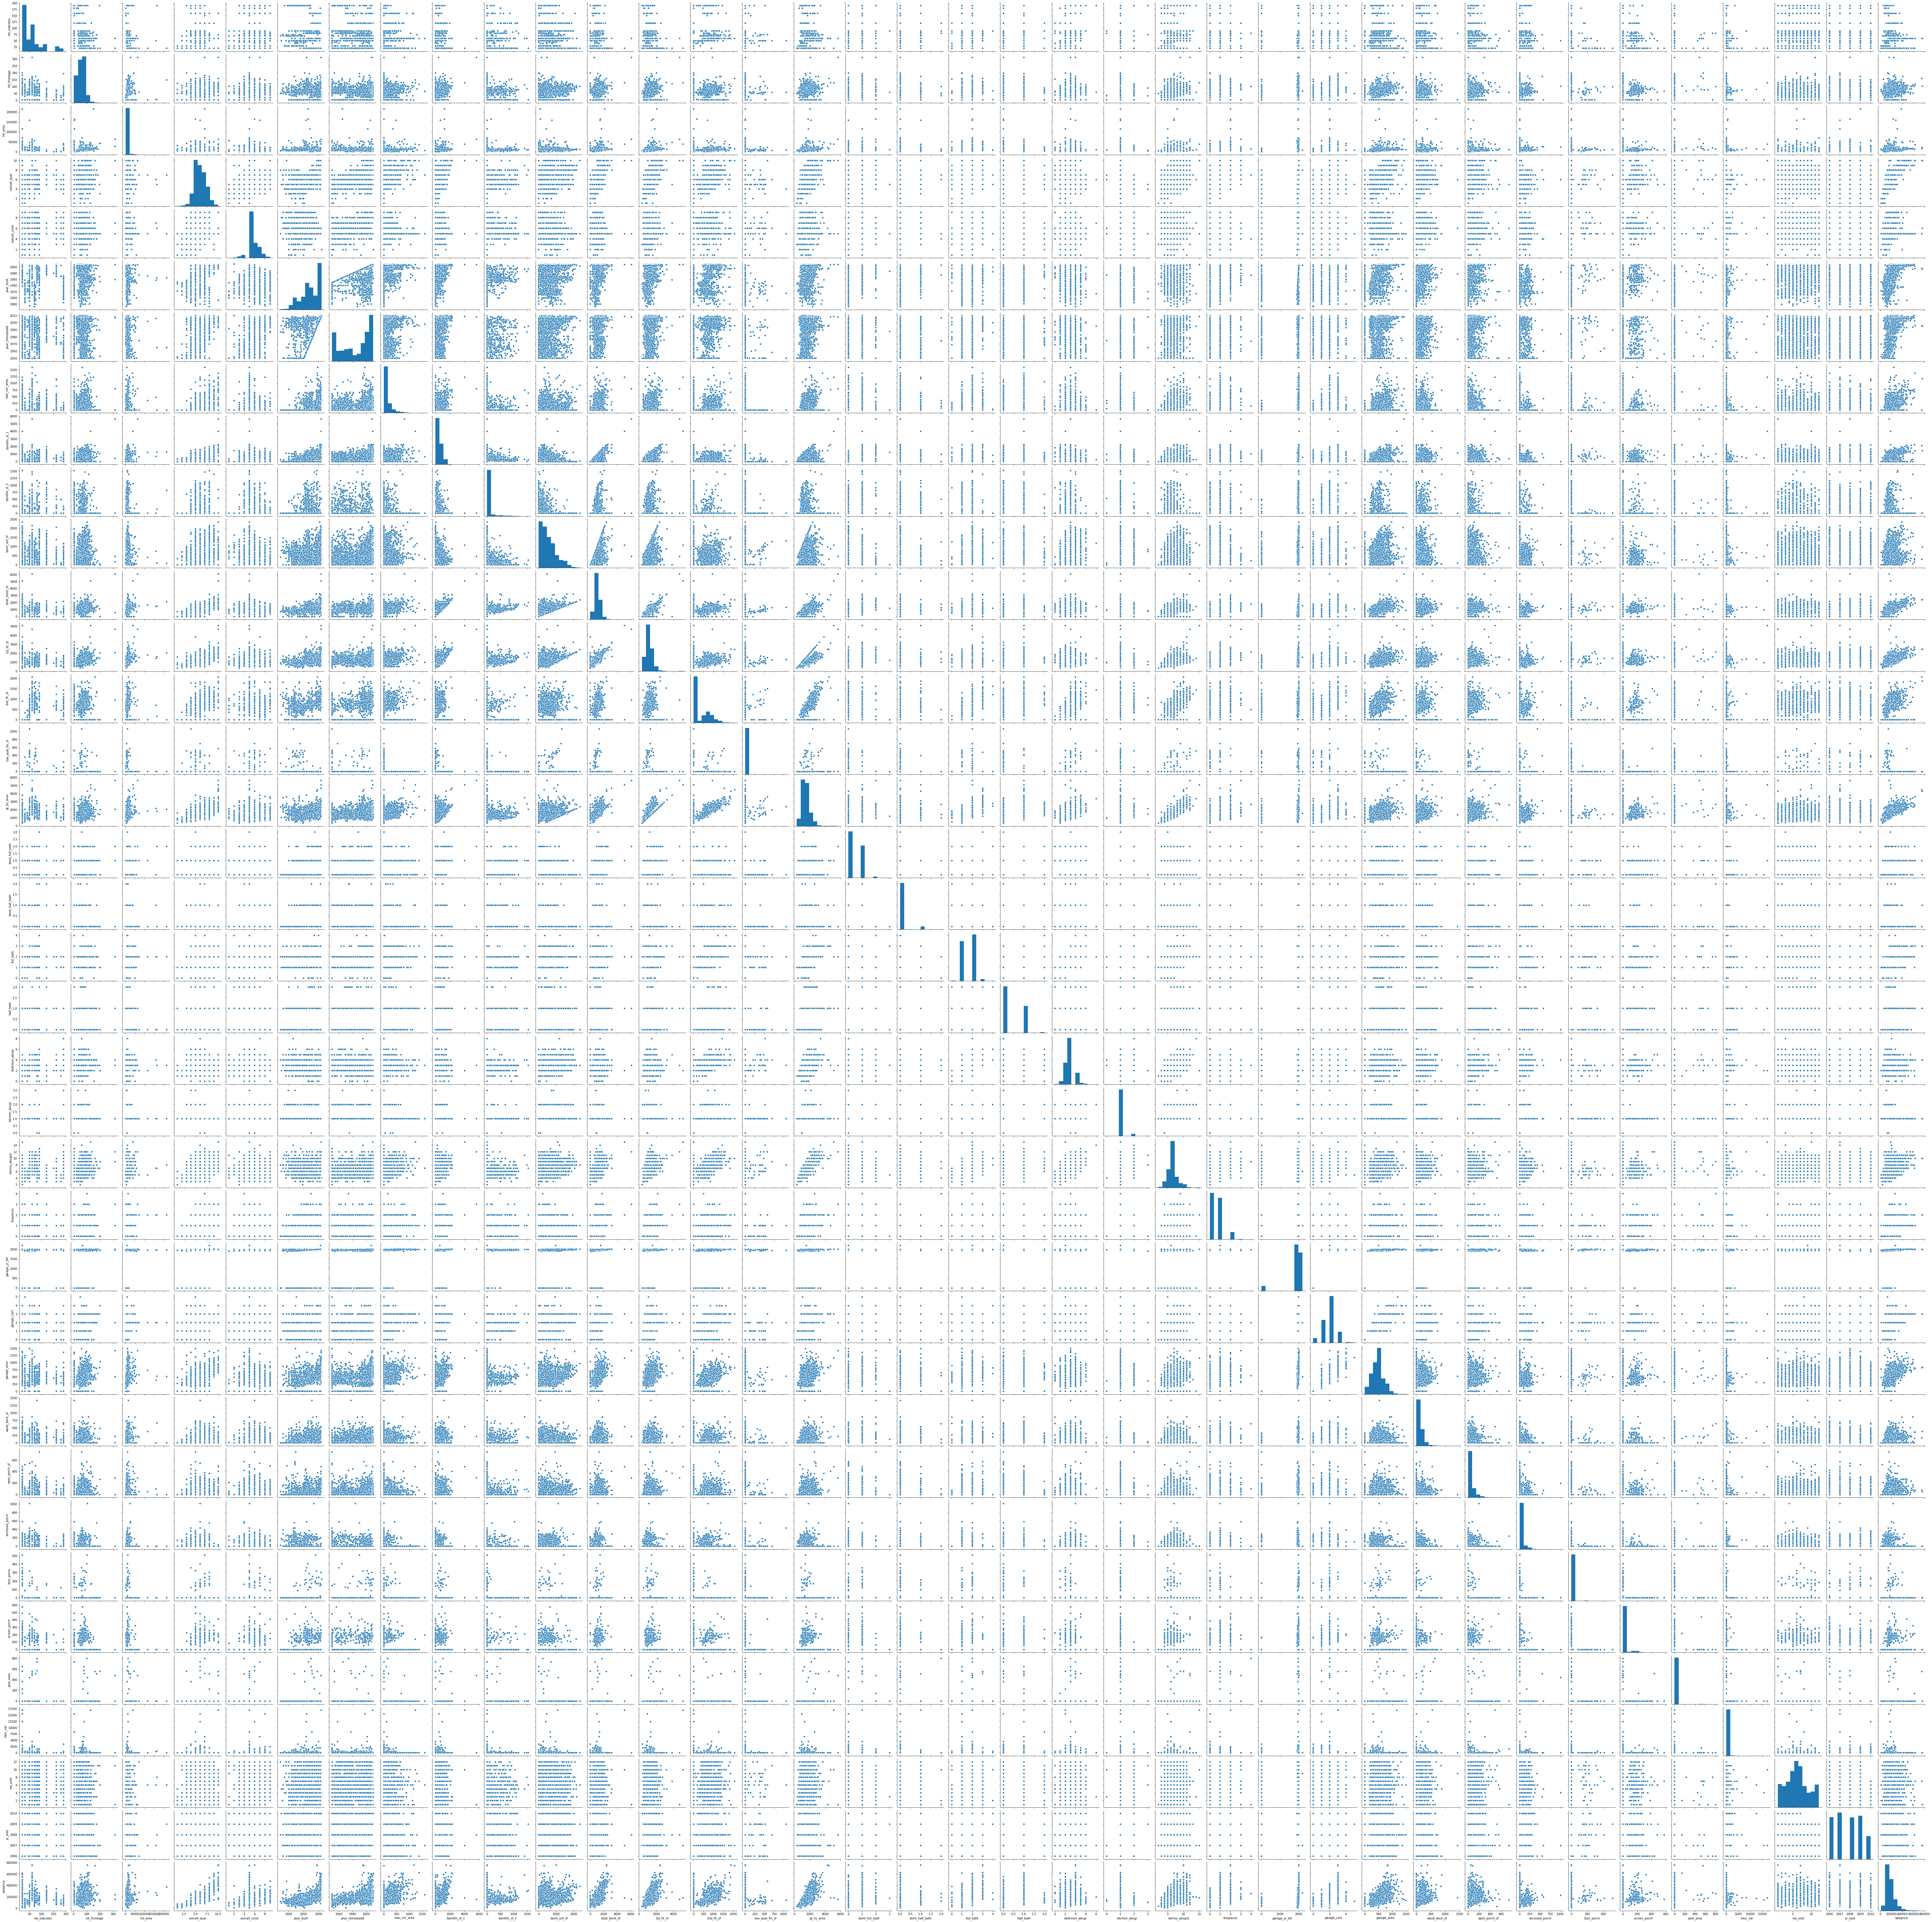

In [4]:
sns.pairplot(df)

## Feature Engenieering

In [5]:
df.corr()['saleprice'].sort_values(ascending = False)

saleprice          1.000000
overall_qual       0.799262
gr_liv_area        0.706780
garage_cars        0.647562
garage_area        0.640138
total_bsmt_sf      0.632529
1st_flr_sf         0.621676
year_built         0.558426
full_bath          0.545604
year_remod/add     0.532974
mas_vnr_area       0.508285
totrms_abvgrd      0.495474
fireplaces         0.474558
bsmtfin_sf_1       0.433147
wood_deck_sf       0.327143
open_porch_sf      0.312951
half_bath          0.285056
bsmt_full_bath     0.275823
2nd_flr_sf         0.269373
lot_area           0.266549
garage_yr_blt      0.253835
lot_frontage       0.210716
bsmt_unf_sf        0.183308
bedroom_abvgr      0.143913
screen_porch       0.112151
pool_area          0.068403
mo_sold            0.035259
3ssn_porch         0.032225
bsmtfin_sf_2       0.006018
misc_val          -0.015691
yr_sold           -0.030569
bsmt_half_bath    -0.035817
low_qual_fin_sf   -0.037660
ms_subclass       -0.085092
overall_cond      -0.101697
kitchen_abvgr     -0

In [6]:
X = df[['overall_qual', 'gr_liv_area', 'garage_cars','garage_area', 
      'total_bsmt_sf', '1st_flr_sf', 'year_built', 'full_bath','year_remod/add', 'kitchen_abvgr',
        'totrms_abvgrd','bsmtfin_sf_1', 'fireplaces','wood_deck_sf','open_porch_sf','half_bath','bsmt_full_bath',
       'bedroom_abvgr','enclosed_porch','lot_area']]
dummy_features =df[['overall_cond', 'condition_1', 'bldg_type', 'neighborhood', 
                    'misc_feature','garage_type','ms_zoning', 'yr_sold',]]

In [7]:
poly = PolynomialFeatures(interaction_only = True, include_bias=False)

In [8]:
x_poly = poly.fit_transform(X)

In [9]:
df_poly = pd.DataFrame(x_poly, columns = poly.get_feature_names(X.columns))

In [10]:
df_poly = df_poly.drop(columns = X.columns)

In [11]:
df_poly.columns

Index(['overall_qual gr_liv_area', 'overall_qual garage_cars',
       'overall_qual garage_area', 'overall_qual total_bsmt_sf',
       'overall_qual 1st_flr_sf', 'overall_qual year_built',
       'overall_qual full_bath', 'overall_qual year_remod/add',
       'overall_qual kitchen_abvgr', 'overall_qual totrms_abvgrd',
       ...
       'half_bath bsmt_full_bath', 'half_bath bedroom_abvgr',
       'half_bath enclosed_porch', 'half_bath lot_area',
       'bsmt_full_bath bedroom_abvgr', 'bsmt_full_bath enclosed_porch',
       'bsmt_full_bath lot_area', 'bedroom_abvgr enclosed_porch',
       'bedroom_abvgr lot_area', 'enclosed_porch lot_area'],
      dtype='object', length=190)

In [12]:
new_df = pd.concat([df_poly, dummy_features], axis =1)
new_df.head()

overall_qual gr_liv_area  overall_qual garage_cars  \
0                    9936.0                      12.0   
1                    4480.0                       5.0   
2                    7974.0                       6.0   
3                   14770.0                      14.0   
4                    8145.0                      10.0   

   overall_qual garage_area  overall_qual total_bsmt_sf  \
0                    3168.0                      6480.0   
1                    3650.0                      4410.0   
2                    1872.0                      7974.0   
3                    3654.0                     14770.0   
4                    2410.0                      4640.0   

   overall_qual 1st_flr_sf  overall_qual year_built  overall_qual full_bath  \
0                   9936.0                  11760.0                     6.0   
1                   4480.0                   9805.0                     5.0   
2                   7974.0                  11748.0                     6.0   
3                  14770.0                  13776.0                    14.0   
4                   4640.0                   9985.0                    10.0   

   overall_qual year_remod/add  overall_qual kitchen_abvgr  \
0                      11760.0                         6.0   
1                       9805.0                         5.0   
2                      11748.0                         6.0   
3                      13776.0                         7.0   
4                       9990.0                         5.0   

   overall_qual totrms_abvgrd  ...  bedroom_abvgr lot_area  \
0                        42.0  ...                 95310.0   
1                        25.0  ...                 23244.0   
2                        36.0  ...                 42801.0   
3                        56.0  ...                 33480.0   
4                        30.0  ...                 41490.0   

   enclosed_porch lot_area  overall_cond  condition_1  bldg_type  \
0                      0.0             5         Norm       1Fam   
1                      0.0             6        Feedr       1Fam   
2                      0.0             6         Norm       1Fam   
3                      0.0             5         Norm       1Fam   
4                      0.0             5         Norm       1Fam   

   neighborhood  misc_feature  garage_type  ms_zoning  yr_sold  
0         NAmes    no_feature       Attchd         RL     2010  
1         NAmes    no_feature       Attchd         RH     2010  
2         NAmes          Gar2       Attchd         RL     2010  
3         NAmes    no_feature       Attchd         RL     2010  
4       Gilbert    no_feature       Attchd         RL     2010  

[5 rows x 198 columns]

## Linear Regression Model 

In [13]:
X = new_df
X = pd.get_dummies(columns = dummy_features.columns, data=X, drop_first = True)

y = df['saleprice']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
lr.score(X_train, y_train)

0.9443689592799985

In [17]:
lr.score(X_test, y_test)

0.846351214271137

In [18]:
y_preds = lr.predict(X_train)

In [19]:
resids =y_train - y_preds

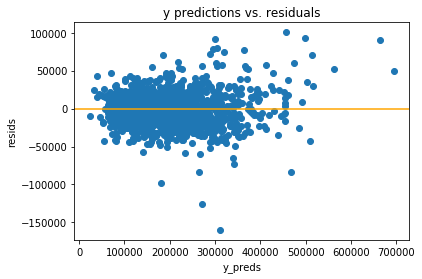

In [20]:
plt.scatter(y_preds, resids)
plt.title ('y predictions vs. residuals')
plt.xlabel('y_preds')
plt.ylabel('resids')
plt.axhline(0, color='orange');

Text(0, 0.5, 'frequency')

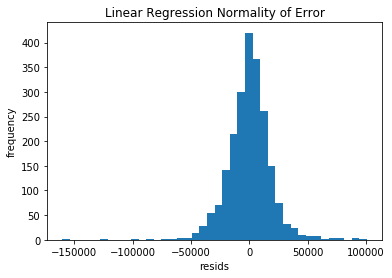

In [21]:
plt.hist(resids, bins = 40);
plt.title('Linear Regression Normality of Error')
plt.xlabel('resids')
plt.ylabel('frequency')

## Ridge

In [22]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [23]:
r_alphas = np.logspace(0,5, 100)

In [24]:
ridge_cv = RidgeCV(
    alphas = r_alphas,
    scoring = 'r2',
    cv = 5
)
ridge_cv.fit(Z_train, y_train);

In [25]:
ridge_cv.alpha_

52.14008287999685

In [26]:
ridge_cv.score(Z_train, y_train)

0.9338897199122868

In [27]:
ridge_cv.score(Z_test, y_test)

0.9041244418885481

In [28]:
ridge_preds = ridge_cv.predict(Z_train)

In [29]:
ridge_resids =y_train - ridge_preds

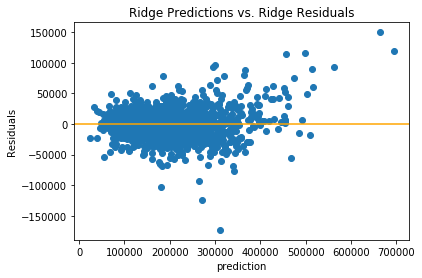

In [30]:
plt.scatter(y_preds, ridge_resids)
plt.title ('Ridge Predictions vs. Ridge Residuals')
plt.xlabel('prediction')
plt.ylabel('Residuals')
plt.axhline(0, color='orange');

Text(0, 0.5, 'frequency')

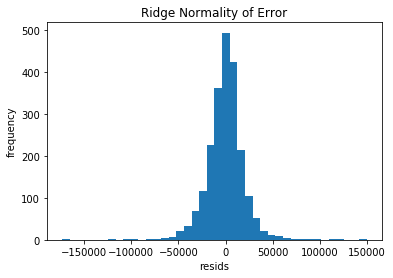

In [31]:
plt.hist(ridge_resids, bins = 40);
plt.title('Ridge Normality of Error')
plt.xlabel('resids')
plt.ylabel('frequency')

##  Lasso 

In [30]:
l_alphas = np.logspace(-3, 0, 100)

In [31]:
lcv = LassoCV(alphas=l_alphas, cv=5, max_iter=10000)

In [32]:
lcv.fit(Z_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124387978311.22601, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48421022421.04651, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35204473317.797485, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86572443673.38672, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88947636304.68433, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93818964009.2752, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You mi

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156649185359.97614, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159560615119.78937, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162318451895.5913, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203687678772.6375, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 204551577871.23322, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205389132367.10724, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108902604652.11267, tolerance: 1046975015.8093845
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115663762297.62543, tolerance: 1046975015.8093845
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121575406434.94672, tolerance: 1046975015.8093845
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. Yo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191943689385.94897, tolerance: 1046975015.8093845
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193097130010.97357, tolerance: 1046975015.8093845
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194204247940.57153, tolerance: 1046975015.8093845
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. Yo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211619011353.19928, tolerance: 1046975015.8093845
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211994872071.4016, tolerance: 1046975015.8093845
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212359978778.2804, tolerance: 1046975015.8093845
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136414026031.19788, tolerance: 1071543798.520718
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130953356406.32092, tolerance: 1071543798.520718
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126402641794.5238, tolerance: 1071543798.520718
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You mi

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91089968991.22736, tolerance: 1071543798.520718
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93375227395.85931, tolerance: 1071543798.520718
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95680130513.04987, tolerance: 1071543798.520718
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You migh

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137259790789.59467, tolerance: 1071543798.520718
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138088581878.93274, tolerance: 1071543798.520718
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138880572112.5677, tolerance: 1071543798.520718
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You mi

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150922498113.27667, tolerance: 1071543798.520718
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151149528619.70044, tolerance: 1071543798.520718
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151367423247.8286, tolerance: 1071543798.520718
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You mi

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80093096715.59235, tolerance: 1068199244.7092372
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82672447859.78052, tolerance: 1068199244.7092372
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84871791831.28088, tolerance: 1068199244.7092372
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You m

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150374964080.41864, tolerance: 1068199244.7092372
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152644418110.83514, tolerance: 1068199244.7092372
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154809137133.42432, tolerance: 1068199244.7092372
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. Yo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190577153465.99005, tolerance: 1068199244.7092372
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191397410030.9644, tolerance: 1068199244.7092372
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192195474791.9983, tolerance: 1068199244.7092372
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127455313139.50195, tolerance: 1078887866.1732447
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126322038113.45679, tolerance: 1078887866.1732447
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132201452922.54614, tolerance: 1078887866.1732447
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. Yo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 188875061051.98846, tolerance: 1078887866.1732447
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190020086321.5564, tolerance: 1078887866.1732447
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191097568160.35474, tolerance: 1078887866.1732447
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210540184753.79712, tolerance: 1078887866.1732447
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210948317835.71008, tolerance: 1078887866.1732447
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211346929796.06635, tolerance: 1078887866.1732447
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. Yo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 222953086496.92938, tolerance: 1078887866.1732447
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 223408442868.8064, tolerance: 1078887866.1732447
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 223856015133.7437, tolerance: 1078887866.1732447
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You 

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
        cv=5, max_iter=10000)

In [33]:
lcv.score(Z_train, y_train)

0.9439652566835164

In [34]:
lcv.score(Z_test, y_test)

0.8499333551268766

## Pipline 

In [35]:
pipe_lasso = Pipeline([
    ('ss', StandardScaler()),
    ('lcv', LassoCV())
])

In [36]:
pipe_lasso.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2787178670.777588, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3365436683.654785, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3598168737.5683594, tolerance: 1063434464.7537172
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You 

Pipeline(steps=[('ss', StandardScaler()), ('lcv', LassoCV())])

In [37]:
pipe_lasso.score(X_train, y_train),pipe_lasso.score(X_test, y_test)

(0.9284677655209994, 0.8963521957351706)

In [38]:
pip_df = pd.DataFrame(zip(pipe_lasso['lcv'].coef_ ,X.columns))

In [39]:
pip_df[pipe_lasso['lcv'].coef_ == 0].head(15)

0                            1
1   0.0     overall_qual garage_cars
5  -0.0      overall_qual year_built
6  -0.0       overall_qual full_bath
9   0.0   overall_qual totrms_abvgrd
12  0.0    overall_qual wood_deck_sf
13  0.0   overall_qual open_porch_sf
14  0.0       overall_qual half_bath
15  0.0  overall_qual bsmt_full_bath
17 -0.0  overall_qual enclosed_porch
20  0.0      gr_liv_area garage_area
21 -0.0    gr_liv_area total_bsmt_sf
22 -0.0       gr_liv_area 1st_flr_sf
23 -0.0       gr_liv_area year_built
25 -0.0   gr_liv_area year_remod/add
26 -0.0    gr_liv_area kitchen_abvgr